In [146]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt

#ignore
import warnings
warnings.filterwarnings('ignore')

# DL Libraries

import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from keras.applications.vgg16 import VGG16


#other util libraries
import os

In [147]:
data_dir = 'data_dir'
test_dir = 'test_dir'

print("data dir exists: ", os.path.exists(data_dir))
print("test_dir exists: ", os.path.exists(test_dir))

data dir exists:  True
test_dir exists:  True


In [148]:
batchSize = 32

trainDataGen = ImageDataGenerator(
    rescale= 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.2
)

testDataGen = ImageDataGenerator(rescale=1/255)




In [149]:
trainData = trainDataGen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size = batchSize,
    class_mode = 'binary',
    subset = 'training'
)

validData = trainDataGen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size = batchSize,
    class_mode = 'binary',
    subset = 'validation'
)

testData = testDataGen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size = batchSize,
    class_mode = 'binary'
)



Found 1500 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Found 3232 images belonging to 2 classes.


In [150]:
classes = trainData.class_indices
print(f'class indices: ', classes)

class indices:  {'humans': 0, 'nothing': 1}


In [151]:
convBase = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [153]:
convBase.trainable = False

model = Sequential()

model.add(convBase)
model.add(BatchNormalization())

model.add(Flatten())

#dense layer with 264 neurons
model.add(Dense(264, activation='relu')) 

model.add(Dropout(0.35))
model.add(BatchNormalization())

# Dense layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())

# Dense layer with 1 units (output layer)
# Input size: 64, Output size: 1
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer= RMSprop(learning_rate=0.001, rho = 0.9, epsilon=1e-07), 
    loss ='binary_crossentropy', 
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_33 (Ba  (None, 7, 7, 512)         2048      
 tchNormalization)                                               
                                                                 
 flatten_13 (Flatten)        (None, 25088)             0         
                                                                 
 dense_33 (Dense)            (None, 264)               6623496   
                                                                 
 dropout_22 (Dropout)        (None, 264)               0         
                                                                 
 batch_normalization_34 (Ba  (None, 264)               1056      
 tchNormalization)                                   

In [154]:

classWeight = compute_class_weight('balanced', classes = np.unique(trainData.classes), y = trainData.classes)
classWeight =   dict(enumerate(classWeight))
print(classWeight)

{0: 0.7455268389662028, 1: 1.5182186234817814}


In [155]:


history = model.fit(
    trainData,
    epochs = 50,
    validation_data = validData,
    class_weight = classWeight
)

Epoch 1/50
47/47 [==============================] - 95s 2s/step - loss: 0.3266 - accuracy: 0.8653 - val_loss: 0.4247 - val_accuracy: 0.7968
Epoch 2/50
47/47 [==============================] - 94s 2s/step - loss: 0.1750 - accuracy: 0.9307 - val_loss: 0.2679 - val_accuracy: 0.8663
Epoch 3/50
47/47 [==============================] - 94s 2s/step - loss: 0.1602 - accuracy: 0.9380 - val_loss: 0.1546 - val_accuracy: 0.9305
Epoch 4/50
47/47 [==============================] - 94s 2s/step - loss: 0.1382 - accuracy: 0.9447 - val_loss: 0.1243 - val_accuracy: 0.9572
Epoch 5/50
47/47 [==============================] - 94s 2s/step - loss: 0.1244 - accuracy: 0.9540 - val_loss: 0.1255 - val_accuracy: 0.9572
Epoch 6/50
47/47 [==============================] - 94s 2s/step - loss: 0.1193 - accuracy: 0.9560 - val_loss: 0.1330 - val_accuracy: 0.9545
Epoch 7/50
47/47 [==============================] - 94s 2s/step - loss: 0.0891 - accuracy: 0.9687 - val_loss: 0.1455 - val_accuracy: 0.9385
Epoch 8/50
47/47 [==

In [ ]:
loss, accuracy = model.evaluate(validData)

12/12 [==============================] - 20s 2s/step - loss: 0.2109 - accuracy: 0.9332


0.0
1/1 [==============================] - 1s 538ms/step
0.0
1/1 [==============================] - 0s 126ms/step
0.0
1/1 [==============================] - 0s 121ms/step
0.0
1/1 [==============================] - 0s 121ms/step
0.0
1/1 [==============================] - 0s 127ms/step
0.0
1/1 [==============================] - 0s 131ms/step
1.0
1/1 [==============================] - 0s 125ms/step
0.0
1/1 [==============================] - 0s 107ms/step
0.0
1/1 [==============================] - 0s 118ms/step
1.0
1/1 [==============================] - 0s 110ms/step
1.0
1/1 [==============================] - 0s 93ms/step
1.0
1/1 [==============================] - 0s 110ms/step


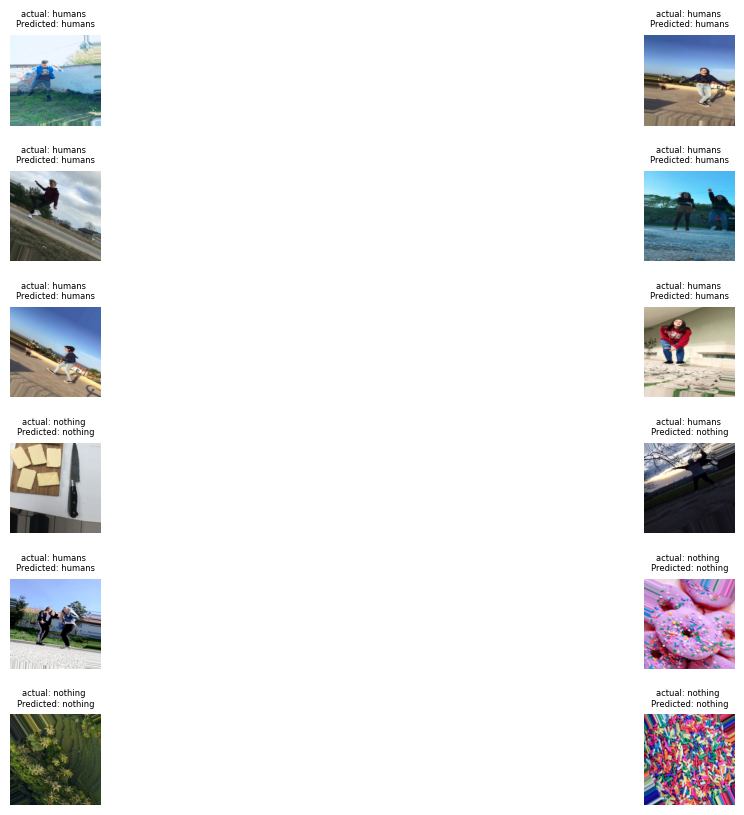

In [157]:
imagesToDisplay = 2112

classes = list(trainData.class_indices.keys())

fig, axes = plt.subplots(6, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate (axes.flat):
    if i < imagesToDisplay:
        img, label = validData[i]

        image = img[0]

        ax.imshow(image)
        actualLabel = classes[int(label[0])]
        print(label[0])
        prediction = model.predict(np.expand_dims(image, axis = 0))
        predicted_class = (prediction > 0.5).astype(int)
        predictedLabel = classes[predicted_class[0][0]]
        
        ax.set_title(f'actual: {actualLabel} \nPredicted: {predictedLabel}', fontsize=6)
        ax.axis('off')

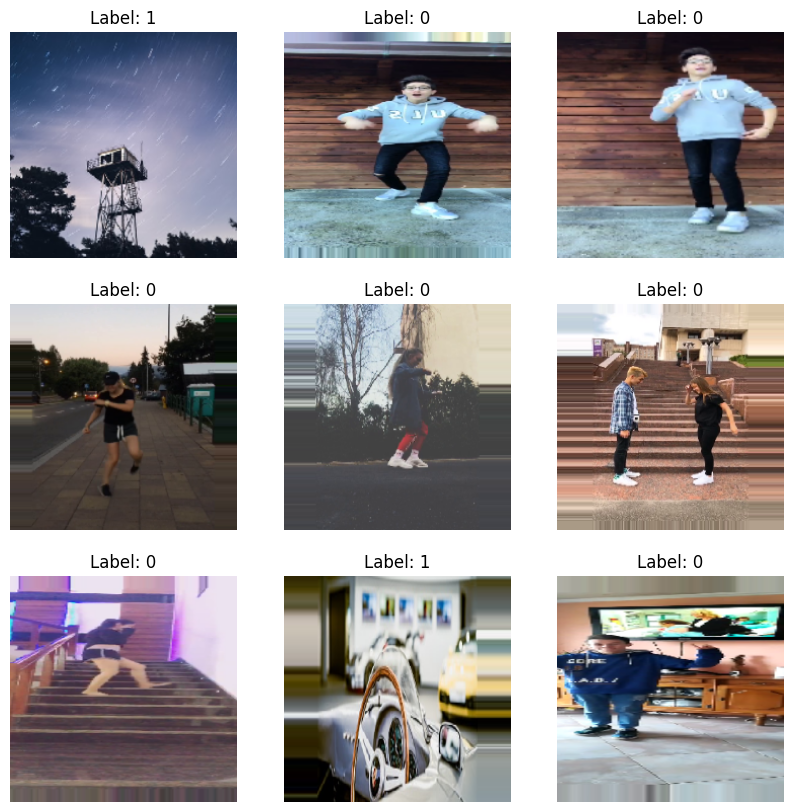

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(trainData)

# Plot the first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title('Label: %d' % labels[i])
    plt.axis('off')
plt.show()

In [156]:
model.save("C:/Users/aahfa/Documents/personalCode/python/ML_AI/ML_NerfGun/relevantModels/humanIdentifyV4.h5")